# Overview

- we know that coconut and pina colada are correlated
- they should be cointegrated 
- pina colada prices can be driven by coconut prices but visavis is false
- cointegrated test might not be necessary but still we can use (Augmented Dickey-Fuller tests, Hurst exponents, and Kalman filters)

In [232]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split
import scipy.optimize as spop
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [195]:
day_m1 = pd.read_csv("prices_round_2_day_-1.csv", sep = ";")
day_1 = pd.read_csv("prices_round_2_day_1.csv", sep = ";")
day_0 = pd.read_csv("prices_round_2_day_0.csv", sep = ";")

In [196]:
day_m1_trade = pd.read_csv("trades_round_2_day_-1_nn.csv", sep = ";")
day_1_trade = pd.read_csv("trades_round_2_day_1_nn.csv", sep = ";")
day_0_trade = pd.read_csv("trades_round_2_day_0_nn.csv", sep = ";")

In [197]:
day_m1_trade

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,PEARLS,SEASHELLS,10004.0,1
1,0,NaN,NaN,BANANAS,SEASHELLS,4952.0,1
2,1100,NaN,NaN,PEARLS,SEASHELLS,9996.0,2
3,1300,NaN,NaN,BANANAS,SEASHELLS,4949.0,3
4,1600,NaN,NaN,COCONUTS,SEASHELLS,8000.0,30
...,...,...,...,...,...,...,...
5944,998800,NaN,NaN,COCONUTS,SEASHELLS,8114.0,22
5945,998900,NaN,NaN,BANANAS,SEASHELLS,4897.0,1
5946,999200,NaN,NaN,BANANAS,SEASHELLS,4896.0,1
5947,999600,NaN,NaN,PEARLS,SEASHELLS,9998.0,1


In [198]:
day_m1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
2,-1,0,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
3,-1,0,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
4,-1,100,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1,999800,PEARLS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,-760.0
39996,-1,999900,PINA_COLADAS,15228,102,NaN,NaN,NaN,NaN,15231,102,NaN,NaN,NaN,NaN,15229.5,-483648.0
39997,-1,999900,COCONUTS,8113,178,NaN,NaN,NaN,NaN,8115,76,8116.0,102.0,NaN,NaN,8114.0,-791928.0
39998,-1,999900,BANANAS,4892,31,NaN,NaN,NaN,NaN,4898,31,NaN,NaN,NaN,NaN,4895.0,216680.0


# Analysis

In [199]:
asset_1 = 'COCONUTS'
asset_2 = 'PINA_COLADAS'

c_df

In [201]:
c_df = day_m1[day_m1['product']=='COCONUTS']
c_df = c_df[["timestamp","product", "mid_price"]]

In [203]:
pivot_df = c_df.pivot_table('mid_price', ['timestamp'], 'product')

In [204]:
pivot_df = pivot_df.reset_index()

In [205]:
pivot_df = pivot_df[['timestamp','COCONUTS']]

In [206]:
pivot_df.index = pivot_df.index.rename('Index')

In [207]:
pivot_df = pivot_df.set_index('timestamp')

In [209]:
#pina colada series
p_df = day_m1[day_m1['product']=='PINA_COLADAS']
p_df = p_df[["timestamp","product", "mid_price"]]

In [210]:
pivot_df_pina = p_df.pivot_table('mid_price', ['timestamp'], 'product')

In [211]:
pivot_df_pina = pivot_df_pina.reset_index()
pivot_df_pina = pivot_df_pina[['timestamp','PINA_COLADAS']]
pivot_df_pina.index = pivot_df_pina.index.rename('Index')
pivot_df_pina = pivot_df_pina.set_index('timestamp')
pivot_df_pina

product,PINA_COLADAS
timestamp,
0,15000.0
100,15000.0
200,14999.5
300,15000.0
400,14999.0
...,...
999500,15234.5
999600,15236.5
999700,15231.0


In [212]:

asset1 = 'COCONUTS'
asset2 = 'PINA_COLADAS'

In [213]:
train = pd.DataFrame()

In [214]:
train ["asset1"]  = pivot_df[asset_1]
train ["asset2"]  = pivot_df_pina[asset_2]

In [181]:
train ["asset1"] = np.log2(train['asset1'])
train ["asset2"] = np.log2(train['asset2'])

In [215]:
train

,asset1,asset2
timestamp,,
0,8000.0,15000.0
100,7999.5,15000.0
200,7998.5,14999.5
300,7999.5,15000.0
400,7998.5,14999.0
...,...,...
999500,8114.5,15234.5
999600,8115.0,15236.5
999700,8113.5,15231.0


In [218]:
cols = ['asset1','asset2']

In [222]:
returns = pd.DataFrame()
for stock in cols:
    returns[stock] = np.append(train[stock][1:].reset_index(drop=True)/train[stock][:-1].reset_index(drop=True) -1, 0)

In [223]:
returns

,asset1,asset2
0,-0.000062,0.000000
1,-0.000125,-0.000033
2,0.000125,0.000033
3,-0.000125,-0.000067
4,-0.000188,-0.000033
...,...,...
9995,0.000062,0.000131
9996,-0.000185,-0.000361
9997,0.000000,-0.000164
9998,0.000062,0.000066


In [231]:
train

,asset1,asset2
timestamp,,
0,8000.0,15000.0
100,7999.5,15000.0
200,7998.5,14999.5
300,7999.5,15000.0
400,7998.5,14999.0
...,...,...
999500,8114.5,15234.5
999600,8115.0,15236.5
999700,8113.5,15231.0


In [233]:
data = train

In [238]:
data

,asset1,asset2
timestamp,,
0,8000.0,15000.0
100,7999.5,15000.0
200,7998.5,14999.5
300,7999.5,15000.0
400,7998.5,14999.0
...,...,...
999500,8114.5,15234.5
999600,8115.0,15236.5
999700,8113.5,15231.0


## Experiment 1

500
day 50000

no trading
gross daily return: 0%
net daily return: 0%
cumulative net return so far: 0.0%

1000
day 100000

long position on asset1 and short position on asset2
gross daily return: 0.01%
net daily return: 0.01%
cumulative net return so far: 0.01%

1500
day 150000

no trading
gross daily return: 0%
net daily return: 0.0%
cumulative net return so far: 0.01%

2000
day 200000

long position on asset1 and short position on asset2
gross daily return: -0.0%
net daily return: -0.0%
cumulative net return so far: 0.01%

2500
day 250000

long position on asset1 and short position on asset2
gross daily return: 0.01%
net daily return: 0.01%
cumulative net return so far: 0.02%

3000
day 300000

long position on asset1 and short position on asset2
gross daily return: -0.01%
net daily return: -0.01%
cumulative net return so far: 0.01%

3500
day 350000

long position on asset1 and short position on asset2
gross daily return: 0.0%
net daily return: 0.0%
cumulative net return so far: 0.02%

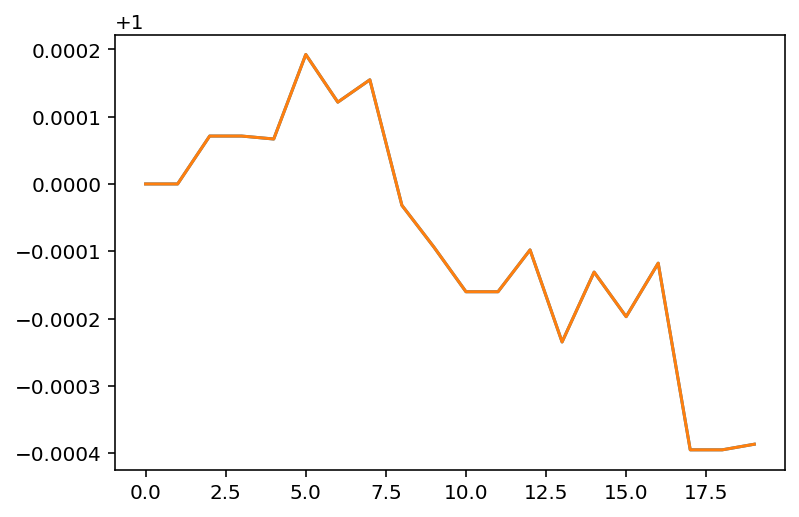

In [242]:
# co integration logic (what should we short and what should we long)
stock1 = 'asset1'
stock2 = 'asset2'


#initialising arrays
gross_returns = np.array([])
net_returns = np.array([])
t_s = np.array([])
window = 500
fee = 0
t_threshold = -2.5

#moving through the sample
for t in range(window, len(data),500):
    print(t)
    #defining the unit root function: stock2 = a + b*stock1
    def unit_root(b):
        a = np.average(data[stock2][t-window:t] - b*data[stock1][t-window:t])
        fair_value = a + b*data[stock1][t-window:t]
        diff = np.array(fair_value - data[stock2][t-window:t])
        diff_diff = diff[1:] - diff[:-1]
        reg = sm.OLS(diff_diff, diff[:-1])
        res = reg.fit()
        return res.params[0]/res.bse[0]
    
    
    #optimising the cointegration equation parameters
    res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead')
    t_opt = res1.fun
    b_opt = float(res1.x)
    a_opt = np.average(data[stock2][t-window:t] - b_opt*data[stock1][t-window:t])
    
    
    #simulating trading
    fair_value = a_opt + b_opt*data[stock1][t]
    if t == window:
        old_signal = 0
    if t_opt > t_threshold:
        signal = 0
        gross_return = 0
    else:
        signal = np.sign(fair_value - data[stock2][t])
        gross_return = signal*returns[stock2][t] - signal*returns[stock1][t]
    
    
    fees = fee*abs(signal - old_signal)
    net_return = gross_return - fees
    gross_returns = np.append(gross_returns, gross_return)
    net_returns = np.append(net_returns, net_return)
    t_s = np.append(t_s, t_opt)
    
    
    
    #interface: reporting daily positions and realised returns
    print('day '+str(data.index[t]))
    print('')
    if signal == 0:
        print('no trading')
    elif  signal == 1:
        print('long position on '+stock2+' and short position on '+stock1)
    else:
        print('long position on '+stock1+' and short position on '+stock2)
    print('gross daily return: '+str(round(gross_return*100,2))+'%')
    print('net daily return: '+str(round(net_return*100,2))+'%')
    print('cumulative net return so far: '+str(round(np.prod(1+net_returns)*100-100,2))+'%')
    print('')
    old_signal = signal
    
#plotting equity curves
plt.plot(np.append(1,np.cumprod(1+gross_returns)))
plt.plot(np.append(1,np.cumprod(1+net_returns)))

    
        